# Kalibrierung und Einsatz eines Infrarot-Entfernungsmessers
## 1. Ermittlung der Kennlinie des Abstandssensors
Insgesamt wurden 21 Ausgangsspannungen in 3-cm-Schritten im Bereich von 20 bis 70 cm gemessen. Hierbei wurden in einer Tabelle die gemessenen Spannungen festgehalten. Zusätzlich wurde pro Abstand die einzelnen gemessenen Werte in einer Datei gespeichert. Der Vergleich der Mittelwerte dieser Dateien und der gemessenen Werte innerhalb der Tabelle ergeben folgende Schaubilder:

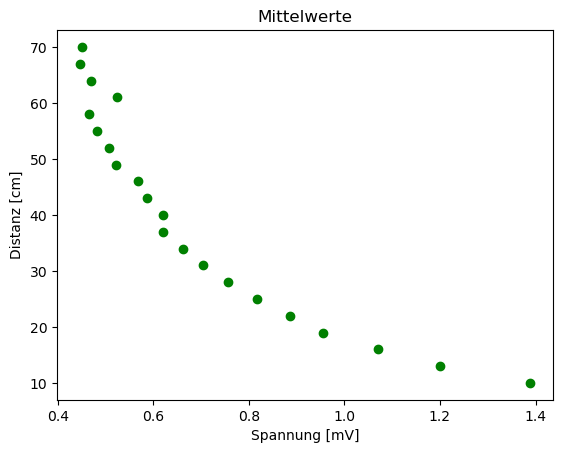

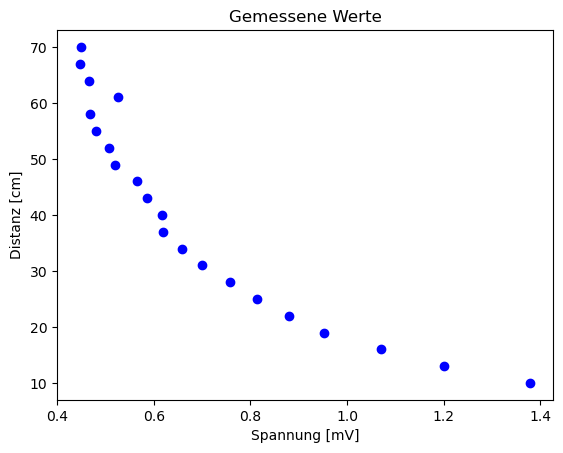

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def get_files():
    file_list = []
    for i in range(10, 73, 3):
        file_list.append('Messungen/Versuch1-' + str(i) + 'cm.csv')
    return file_list

def comma_into_dot(x):
    return float(x.replace(',', '.'))

measured_voltage_list = np.array([1.38, 1.20, 1.07, 0.952, 0.880, 0.813, 0.757, 0.699, 0.659, 0.619, 0.617, 0.585, 0.564, 0.520, 0.506, 0.480, 0.467, 0.525, 0.466, 0.446, 0.449])
distance_list = np.arange(10, 73, 3)
voltage_list = []
std_list = []

for file in get_files():
    voltages = np.genfromtxt(file, delimiter=';', skip_header=1000, max_rows=100, dtype=float, converters={0: comma_into_dot, 1: comma_into_dot})[:, 1]

    voltage_list.append(np.mean(voltages))
    std_list.append(np.std(voltages))

plt.scatter(voltage_list, distance_list, color="green")
plt.xlabel("Spannung [mV]")
plt.ylabel("Distanz [cm]")
plt.title("Mittelwerte")
plt.show()

plt.scatter(measured_voltage_list, distance_list, color="blue")
plt.xlabel("Spannung [mV]")
plt.ylabel("Distanz [cm]")
plt.title("Gemessene Werte")
plt.show()

Beide Kennlinien sehen identisch aus. In `std_list` sind die Standardabweichungen gespeichert:

In [4]:
print(std_list)

[np.float64(0.022146832475494056), np.float64(0.022646418879628684), np.float64(0.017619056456788476), np.float64(0.022878300944758897), np.float64(0.014967892737005419), np.float64(0.02333534086371785), np.float64(0.01752261968791683), np.float64(0.014803220789225042), np.float64(0.01789360127047868), np.float64(0.019966947789245685), np.float64(0.020468597763422858), np.float64(0.023410596807840196), np.float64(0.016912096747859956), np.float64(0.01950277523059157), np.float64(0.01834085190675725), np.float64(0.02121428346359126), np.float64(0.012180254639773177), np.float64(0.018762320000000002), np.float64(0.016820271064369785), np.float64(0.02344815896084916), np.float64(0.022646274038336172)]


## 2. Modellierung der Kennlinie durch lineare Regression
Zuerst wurden die Spannungen und Distanzen logarithmiert um eine lineare Regression durchführen zu können. Aus diesen Werten wurden Mittelwerte gebildet.

In [5]:
log_voltage_list = np.log(voltage_list)
log_distance_list = np.log(distance_list)

voltage_mean = np.mean(log_voltage_list)
distance_mean = np.mean(log_distance_list)

Anschließend wurden Steigung (a) und Offset (b) für die lineare Regression nach y = a * x + b berechnet. Folgendes Schaubild ergibt sich:

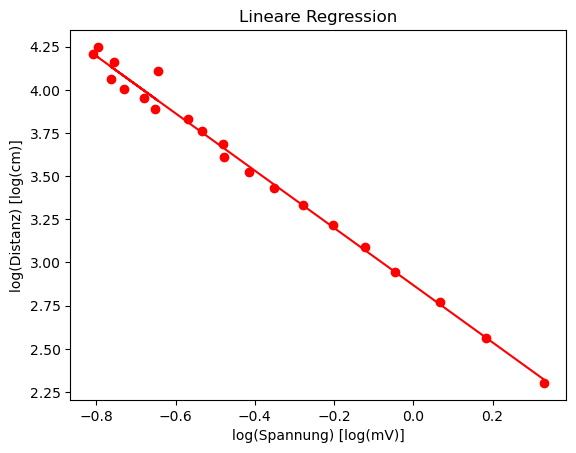

In [14]:
def get_gradient():
    v = log_voltage_list - voltage_mean
    d = log_distance_list - distance_mean

    return np.sum(d * v) / np.sum(np.power(v, 2))

# a
gradient = get_gradient()
# b
offset = distance_mean - (voltage_mean * gradient)

linear_regression_distance = gradient * log_voltage_list + offset

plt.plot(log_voltage_list, linear_regression_distance, color="red")
plt.scatter(log_voltage_list, log_distance_list, color="red")
plt.xlabel("log(Spannung) [log(mV)]")
plt.ylabel("log(Distanz) [log(cm)]")
plt.title("Lineare Regression")
plt.show()

Hieraus wurde schließlich die nicht-lineare Regression nach y = e^b * x^a berechnet. Folgendes Schaubild hat sich ergeben:

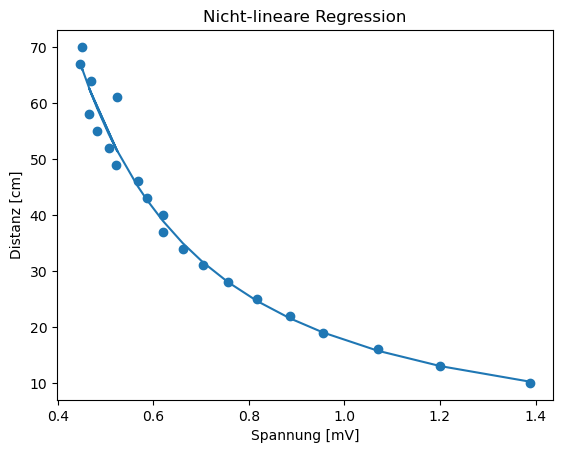

In [15]:
non_linear_regression_distance = np.exp(offset) * np.power(voltage_list, gradient)

plt.plot(voltage_list, non_linear_regression_distance)
plt.scatter(voltage_list, distance_list)
plt.xlabel("Spannung [mV]")
plt.ylabel("Distanz [cm]")
plt.title("Nicht-lineare Regression")
plt.show()

## 3. Flächenmessung mit Fehlerrechnung
Der zufällige Fehler der Spannungsmessung lässt sich über die Standardabweichung schätzen.

In [16]:
width_voltage_list = np.genfromtxt("Messungen/Versuch2-Breite.csv", delimiter=';', skip_header=1000, max_rows=100, dtype=float, converters={0: comma_into_dot, 1: comma_into_dot})[:, 1]
length_voltage_list =  np.genfromtxt("Messungen/Versuch2-Laenge.csv", delimiter=';', skip_header=1000, max_rows=100, dtype=float, converters={0: comma_into_dot, 1: comma_into_dot})[:, 1]

width_voltage_std = np.std(width_voltage_list, ddof=1)
length_voltage_std = np.std(length_voltage_list, ddof=1)

print(f"s(Spannung Breite) = {width_voltage_std}")
print(f"s(Spannung Länge) = {length_voltage_std}")

s(Spannung Breite) = 0.016964817958964727
s(Spannung Länge) = 0.018433210302635575


Das Ergebnis der Spannungsmessung in korrekter Form ergibt sich durch:

In [9]:
width_mean = np.mean(width_voltage_list)
length_mean = np.mean(length_voltage_list)

correction_68 = 1.0
correction_95 = 1.96

width_voltage_mean_std = width_voltage_std / np.sqrt(len(width_voltage_list))
length_voltage_mean_std = length_voltage_std / np.sqrt(len(length_voltage_list))

print(f"U(Breite) = {width_mean} +/- {correction_95} * {width_voltage_mean_std} V")
print(f"(Länge) = {length_mean} +/- {correction_95} * {length_voltage_mean_std} V")

U(Breite) = 0.9373630859999998 +/- 1.96 * 0.0016879780741970677 V
(Länge) = 0.7584522610000002 +/- 1.96 * 0.0018340812676666714 V


Die Vertrauensbereiche für Sicherheiten von 68% und 95% für die Länge und Breite lauten:

In [10]:
print(f"Vetrauensbereich 68% Breite: {correction_68} * {width_voltage_mean_std} = {correction_68 * width_voltage_mean_std}")
print(f"Vetrauensbereich 95% Breite: {correction_95} * {width_voltage_mean_std} = {correction_95 * width_voltage_mean_std}")
print(f"Vetrauensbereich 68% Länge: {correction_68} * {length_voltage_mean_std} = {correction_68 * length_voltage_mean_std}")
print(f"Vetrauensbereich 95% Länge: {correction_95} * {length_voltage_mean_std} = {correction_95 * length_voltage_mean_std}")

Vetrauensbereich 68% Breite: 1.0 * 0.0016879780741970677 = 0.0016879780741970677
Vetrauensbereich 95% Breite: 1.96 * 0.0016879780741970677 = 0.0033084370254262527
Vetrauensbereich 68% Länge: 1.0 * 0.0018340812676666714 = 0.0018340812676666714
Vetrauensbereich 95% Länge: 1.96 * 0.0018340812676666714 = 0.0035947992846266756


Mithilfe der Fehlerfortplanzung lassen sich schließlich Länge und Breite in korrekter Form angeben:

In [11]:
# f(x) = e^b * x^a
# f'(x) = e^b * a * x^(a-1)
width = np.exp(offset) * np.power(width_mean, gradient)
length = np.exp(offset) * np.power(length_mean, gradient)

width_error = np.exp(offset) * gradient * np.power(width_mean, gradient - 1) * width_voltage_mean_std
length_error = np.exp(offset) * gradient * np.power(length_mean, gradient - 1) * length_voltage_mean_std

print(f"w = {width} +/- {correction_95} * {width_error} cm")
print(f"l = {length} +/- {correction_95} * {length_error} cm")

w = 19.608064028114484 +/- 1.96 * -0.05857536748582454 cm
l = 27.862499310454147 +/- 1.96 * -0.11177167178232963 cm


Durch die Fehlerfortpflanzung ergibt sich für die Fläche in korrekter Form folgender Wert:

In [12]:
# wv: width voltage
# lv: length voltage
# f(wv, lv) = e^b * wv^a * e^b * lv^a = e^(2b) * wv^a * lv^a
# df/dwv = e^(2b) * a * wv^(a-1) * lv^a
# df/dlv = e^(2b) * wv^a * a * lv^(a-1)

area = width * length

dwv = np.exp(2 * offset) * gradient * np.pow(width_mean, gradient - 1) * np.pow(length_mean, gradient)
dlv = np.exp(2 * offset) * np.pow(width_mean, gradient) * gradient * np.pow(length_mean, gradient - 1)

area_error = np.sqrt(np.pow(dwv * width_voltage_mean_std, 2) + np.pow(dlv * length_voltage_mean_std, 2))

print(f"a = {area} +/- {correction_95} * {area_error} cm^2")

a = 546.3296704626806 +/- 1.96 * 2.7325504899255213 cm^2
